Problem 1


Training with learning rate: 0.0001
Epoch 500, Loss 576.6027
Epoch 1000, Loss 485.2119
Epoch 1500, Loss 401.8285
Epoch 2000, Loss 326.4525
Epoch 2500, Loss 259.0842
Epoch 3000, Loss 199.7235
Epoch 3500, Loss 148.3702
Epoch 4000, Loss 105.0244
Epoch 4500, Loss 69.6860
Epoch 5000, Loss 42.3551
Final loss: 42.3085
Final parameters: w2=0.4999, w1=0.4999, b=-0.5000

Training with learning rate: 0.001
Epoch 500, Loss 42.8167
Epoch 1000, Loss 6.0009
Epoch 1500, Loss 3.9043
Epoch 2000, Loss 3.3212
Epoch 2500, Loss 3.2636
Epoch 3000, Loss 3.2312
Epoch 3500, Loss 3.2017
Epoch 4000, Loss 3.1729
Epoch 4500, Loss 3.1448
Epoch 5000, Loss 3.1175
Final loss: 3.1172
Final parameters: w2=0.5724, w1=-0.7160, b=-2.5320

Training with learning rate: 0.01
Epoch 500, Loss 3.0617
Epoch 1000, Loss 2.8560
Epoch 1500, Loss 2.7895
Epoch 2000, Loss 2.7650
Epoch 2500, Loss 2.7552
Epoch 3000, Loss 2.7510
Epoch 3500, Loss 2.7493
Epoch 4000, Loss 2.7485
Epoch 4500, Loss 2.7482
Epoch 5000, Loss 2.7480
Final loss: 2.82

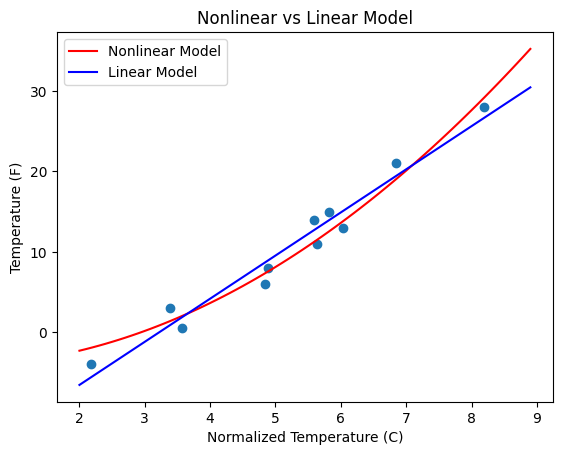

Nonlinear model loss: 2.8238
Best nonlinear learning rate: 0.01
Linear model loss: 2.9276
Linear model parameters: w=5.3677, b=-17.3048


In [6]:
import torch
import matplotlib.pyplot as plt

# Data preparation
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]).unsqueeze(1)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]).unsqueeze(1)

# Normalize the input data
t_un = 0.1 * t_u

# Linear regression calculation
X = torch.cat([torch.ones_like(t_un), t_un], dim=1)
w_b_linear = torch.linalg.lstsq(X, t_c).solution.squeeze()
w_linear, b_linear = w_b_linear[1], w_b_linear[0]

# Rest of the code remains the same
def model(t_u, w2, w1, b):
    return w2 * t_u.pow(2) + w1 * t_u + b

def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

# 1a
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad.clamp(-1, 1)  # Gradient clipping
        
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Loss {loss.item():.4f}')
    return params

# 1b
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
best_loss = float('inf')
best_params = None

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    final_params = training_loop(5000, lr, params, t_un, t_c)
    final_loss = loss_fn(model(t_un, *final_params), t_c).item()
    print(f"Final loss: {final_loss:.4f}")
    print(f"Final parameters: w2={final_params[0].item():.4f}, w1={final_params[1].item():.4f}, b={final_params[2].item():.4f}")
    
    if final_loss < best_loss:
        best_lr = lr
        best_loss = final_loss
        best_params = final_params.detach().clone()

# 1c
t_un_range = torch.arange(2.0, 9.0, 0.1).unsqueeze(1)
fig, ax = plt.subplots()
ax.scatter(t_un, t_c)
ax.plot(t_un_range, model(t_un_range, *best_params), 'r-', label='Nonlinear Model')
ax.plot(t_un_range, w_linear * t_un_range + b_linear, 'b-', label='Linear Model')
ax.legend()
plt.xlabel('Normalized Temperature (C)')
plt.ylabel('Temperature (F)')
plt.title('Nonlinear vs Linear Model')
plt.show()

loss_nonlinear = loss_fn(model(t_un, *best_params), t_c)
loss_linear = loss_fn(w_linear * t_un + b_linear, t_c)
print(f"Nonlinear model loss: {loss_nonlinear.item():.4f}")
print(f"Best nonlinear learning rate: {best_lr}")
print(f"Linear model loss: {loss_linear.item():.4f}")
print(f"Linear model parameters: w={w_linear.item():.4f}, b={b_linear.item():.4f}")

Problem 2

LR: 0.1, Epoch: 0, Train Loss: 25234792406487.6133, Val Loss: 30129994020642.2031
LR: 0.1, Epoch: 500, Train Loss: 1358623365752.1360, Val Loss: 2313594877456.0654
LR: 0.1, Epoch: 1000, Train Loss: 1350308265383.3105, Val Loss: 2293964938033.3105
LR: 0.1, Epoch: 1500, Train Loss: 1350024041668.0166, Val Loss: 2292591049189.2827
LR: 0.1, Epoch: 2000, Train Loss: 1350009224228.2935, Val Loss: 2292614606581.1294
LR: 0.1, Epoch: 2500, Train Loss: 1350008281337.4697, Val Loss: 2292681018503.4712
LR: 0.1, Epoch: 3000, Train Loss: 1350008216310.6379, Val Loss: 2292708703615.7817
LR: 0.1, Epoch: 3500, Train Loss: 1350008211685.3486, Val Loss: 2292717770920.4214
LR: 0.1, Epoch: 4000, Train Loss: 1350008211352.5127, Val Loss: 2292720477406.8213
LR: 0.1, Epoch: 4500, Train Loss: 1350008211328.4575, Val Loss: 2292721249592.0615

LR: 0.01, Epoch: 0, Train Loss: 25234792406487.6133, Val Loss: 30129994020642.2031
LR: 0.01, Epoch: 500, Train Loss: 1699450104434.1807, Val Loss: 2915957292998.8359
LR: 0

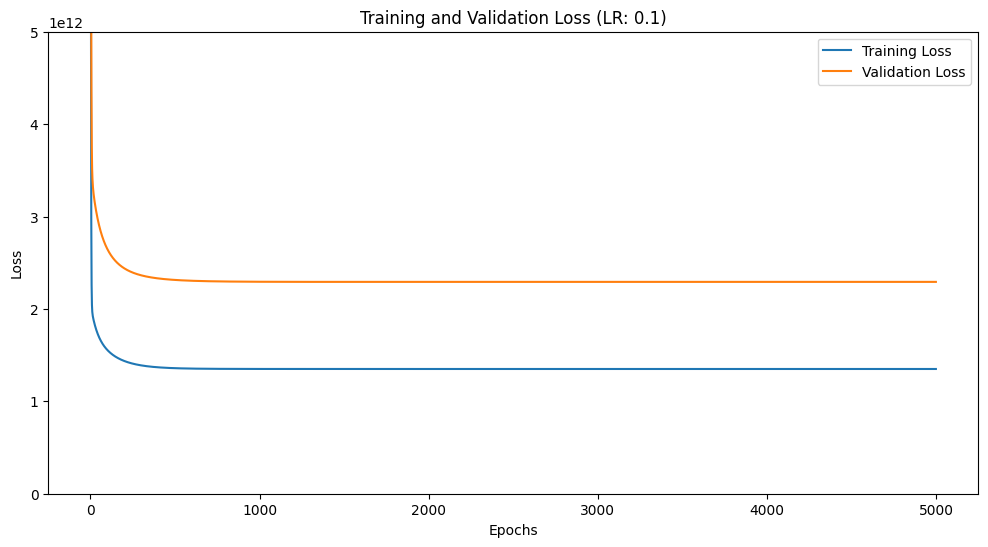

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the housing dataset
df = pd.read_csv('Housing.csv')  # Replace with your actual dataset path

# Select features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df[features]
y = df['price']  # Assuming 'price' is the target column

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Add bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]

# Linear Regression model
class LinearRegression:
    def __init__(self, lr=0.01, epochs=5000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
    
    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        train_losses = []
        val_losses = []
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            train_loss = np.mean((y_pred - y) ** 2)
            train_losses.append(train_loss)
            
            # Calculate validation loss
            y_val_pred = np.dot(X_val, self.weights)
            val_loss = np.mean((y_val_pred - y_val) ** 2)
            val_losses.append(val_loss)
            
            # Gradient descent
            gradient = 2 * np.dot(X.T, (y_pred - y)) / n_samples
            self.weights -= self.lr * gradient
            
        return train_losses, val_losses
    
    def predict(self, X):
        return np.dot(X, self.weights)

# Train and evaluate function
def train_and_evaluate(lr):
    model = LinearRegression(lr=lr)
    train_losses, val_losses = model.fit(X_train, y_train, X_val, y_val)
    return model, train_losses, val_losses

# Train models with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
    model, train_losses, val_losses = train_and_evaluate(lr)
    results.append((lr, model, train_losses, val_losses))
    
    # Report loss and validation accuracy every 500 epochs
    for i in range(0, 5000, 500):
        print(f"LR: {lr}, Epoch: {i}, Train Loss: {train_losses[i]:.4f}, Val Loss: {val_losses[i]:.4f}")
    print()

# Find the best model based on the final validation loss
best_model = min(results, key=lambda x: x[3][-1])
print(f"\nBest model - LR: {best_model[0]}, Final Val Loss: {best_model[3][-1]:.4f}")

# Plot losses for the best model
plt.figure(figsize=(12, 6))
plt.plot(best_model[2], label='Training Loss')
plt.plot(best_model[3], label='Validation Loss')
plt.title(f"Training and Validation Loss (LR: {best_model[0]})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.ylim(0, min(0.5e13, max(max(best_model[2]), max(best_model[3]))))  # Adjust y-axis limit
plt.show()

Problem 3


LR: 0.1, Epoch: 0, Train Loss: 26316912644942.6602, Val Loss: 25801513066822.0195
LR: 0.1, Epoch: 500, Train Loss: 1067628125383.4948, Val Loss: 1410416565404.6599
LR: 0.1, Epoch: 1000, Train Loss: 1058852102721.6520, Val Loss: 1413359539666.9343
LR: 0.1, Epoch: 1500, Train Loss: 1058399040272.2876, Val Loss: 1415086835887.4321
LR: 0.1, Epoch: 2000, Train Loss: 1058371844606.7244, Val Loss: 1415553979078.1760
LR: 0.1, Epoch: 2500, Train Loss: 1058370128764.7242, Val Loss: 1415692772238.3391
LR: 0.1, Epoch: 3000, Train Loss: 1058370017495.3933, Val Loss: 1415736278288.4966
LR: 0.1, Epoch: 3500, Train Loss: 1058370010104.6530, Val Loss: 1415749950744.3489
LR: 0.1, Epoch: 4000, Train Loss: 1058370009601.9650, Val Loss: 1415754184416.5525
LR: 0.1, Epoch: 4500, Train Loss: 1058370009566.9718, Val Loss: 1415755473225.9272

LR: 0.01, Epoch: 0, Train Loss: 26316912644942.6602, Val Loss: 25801513066822.0195
LR: 0.01, Epoch: 500, Train Loss: 1373884060935.1709, Val Loss: 1536651132142.6421
LR: 

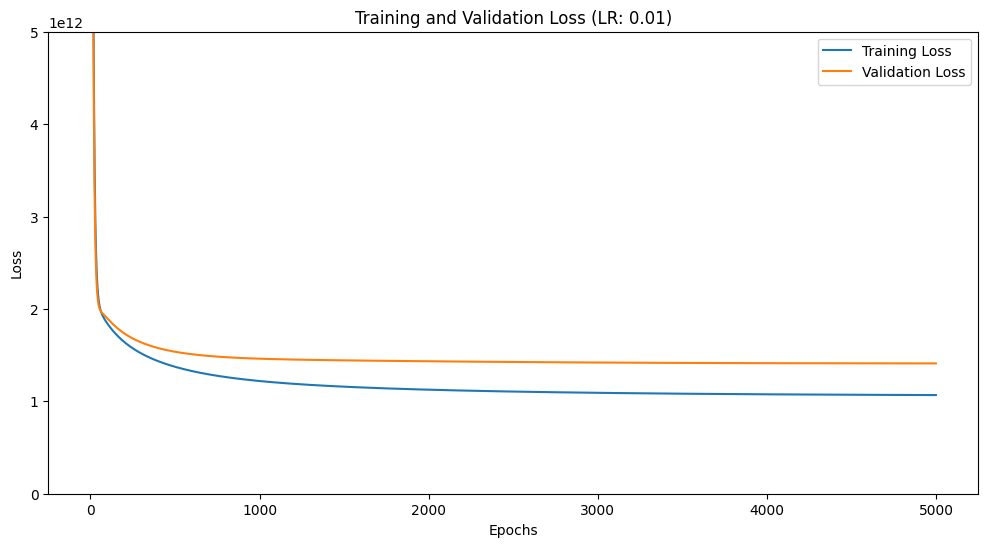


Best parameters:
Bias: 2015216.4409
area: 2810341.4886
bedrooms: 795937.3157
bathrooms: 3055990.9593
stories: 1318695.1710
parking: 1206830.4504
mainroad_yes: 451550.9432
guestroom_yes: 393943.6581
basement_yes: 325996.2972
hotwaterheating_yes: 897509.2264
airconditioning_yes: 817311.9276
prefarea_yes: 737631.4619
furnishingstatus_semi-furnished: 4812.0173
furnishingstatus_unfurnished: -489819.7653


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the housing dataset
df = pd.read_csv('Housing.csv')  # Replace with your actual dataset path

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing steps
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor and transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names = (numeric_features.tolist() + 
                 preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=96)

# Add bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_val = np.c_[np.ones((X_val.shape[0], 1)), X_val]

class LinearRegression:
    def __init__(self, lr=0.01, epochs=5000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
    
    def fit(self, X, y, X_val, y_val):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        train_losses = []
        val_losses = []
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights)
            train_loss = np.mean((y_pred - y) ** 2)
            train_losses.append(train_loss)
            
            y_val_pred = np.dot(X_val, self.weights)
            val_loss = np.mean((y_val_pred - y_val) ** 2)
            val_losses.append(val_loss)
            
            gradient = 2 * np.dot(X.T, (y_pred - y)) / n_samples
            self.weights -= self.lr * gradient
            
        return train_losses, val_losses
    
    def predict(self, X):
        return np.dot(X, self.weights)

def train_and_evaluate(lr):
    model = LinearRegression(lr=lr)
    train_losses, val_losses = model.fit(X_train, y_train, X_val, y_val)
    return model, train_losses, val_losses

learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
    model, train_losses, val_losses = train_and_evaluate(lr)
    print()
    results.append((lr, model, train_losses, val_losses))
    
    # Report loss and validation accuracy every 500 epochs
    for i in range(0, 5000, 500):
        print(f"LR: {lr}, Epoch: {i}, Train Loss: {train_losses[i]:.4f}, Val Loss: {val_losses[i]:.4f}")

# Find the best model based on the final validation loss
best_model = min(results, key=lambda x: x[3][-1])
print(f"\nBest model - LR: {best_model[0]}, Final Val Loss: {best_model[3][-1]:.4f}")

# Plot losses for the best model
plt.figure(figsize=(12, 6))
plt.plot(best_model[2], label='Training Loss')
plt.plot(best_model[3], label='Validation Loss')
plt.title(f"Training and Validation Loss (LR: {best_model[0]})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.ylim(0, min(0.5e13, max(max(best_model[2]), max(best_model[3]))))
plt.show()

# Print the best parameters
print("\nBest parameters:")
for feature, weight in zip(["Bias"] + feature_names, best_model[1].weights):
    print(f"{feature}: {weight:.4f}")